# **Yelp Dataset Analysis**
### A subset of Yelp' s business, reviews and user data obtained from Kaggle is analyzed. Data is pulled from a public s3 bucket: s3://yelpdata.1/yelp_academic_dataset_business.json


# **Installation and Initial Setup**

## Install Packages

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



# **Importing**
## Import installed packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .master("local") \
        .appName("Analysis of yelp data") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# **Loading data**
## Loading Business Dataset

In [5]:
busidf = spark.read.json('s3://yelpdata.1/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

In [6]:
print(f'Business Dataset-Total Columns: {len(busidf.dtypes)},Total Rows: {busidf.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Business Dataset-Total Columns: 14,Total Rows: 209,393

## Display DataFrame schema

In [9]:
print("Business Dataset Dataframe Schema")
busidf.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Business Dataset Dataframe Schema
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = t

## Display the first 5 rows of selected columns


In [10]:
from pyspark.sql import functions as f
busidf.select("business_id","name","city","state","categories").show(5) #take(5) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

In [11]:
busidf.createOrReplaceTempView('business')
idcatdf=spark.sql("SELECT business_id,categories FROM business")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# **Analyzing Categories**
## **Association Table**
 An association table maps a single business id multiple times to each distinct category
### Displaying top 5 rows

In [12]:
from pyspark.sql.functions import split, explode
splitdf = idcatdf.select(idcatdf.business_id, explode(split(idcatdf.categories, ', ')).alias('category'))
splitdf.show(5)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

# **Total Unique Categories**


In [13]:
countdf=splitdf.groupBy("category").count()
print(f'Number of distinct categories:{countdf.count():,}') 
#splitdf.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of distinct categories:1,336

# **Top Categories By Business**
## **Counts of Businesses / Category**


In [14]:
countdf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|      Data Recovery|  195|
|      Videographers|  169|
|      Skating Rinks|  104|
|             Fondue|   54|
|    Pet Photography|   49|
|  Pet Waste Removal|   34|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|       Aerial Tours|   28|
|  Signature Cuisine|    1|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|Private Jet Charter|   10|
+-------------------+-----+
only showing top 20 rows

## **Bar Chart of Top Categories**

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

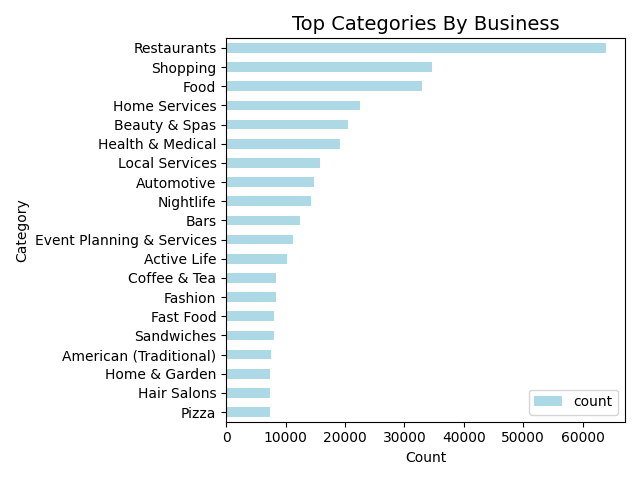

In [15]:
sortdf=countdf.sort('count',ascending=False).limit(20).toPandas()
fig = sortdf.plot(kind='barh', x='category', y='count',facecolor='lightblue')
fig.set_xlabel("Count",size=10)
fig.set_ylabel("Category",size=10)
fig.set_title("Top Categories By Business",size=14)
plt.tight_layout()
plt.gca().invert_yaxis()
%matplot plt

# **Do Yelp Reviews Skew Negative?**
## **Loading User Data**


In [16]:
#Load review dataset
reviewdf=spark.read.json('s3://yelpdata.1/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
reviewdf.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [18]:
from pyspark.sql import functions as f
reviewdf.select("business_id","stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

### Average Star per Business

In [19]:
reviewdf.createOrReplaceTempView('review')
stardf=spark.sql("SELECT business_id,stars FROM review")
avgstardf=stardf.groupBy('business_id').avg()
avgstardf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

### Join Review and Business data by business_id

In [20]:
bstardf=spark.sql("SELECT business_id,stars,name,city,state FROM business")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
joindf=avgstardf.join(bstardf,"business_id").drop("business_id")
joindf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+
|        avg(stars)|stars|                name|       city|state|
+------------------+-----+--------------------+-----------+-----+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|
+------------------+-----+--------------------+-----------+-----+
only showing top 5 rows

### The Skew

The skew between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating)is calculated using following formula:


(row['avg(stars)'] - row['stars']) / row['stars']

If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.


In [22]:
skewdf=joindf.withColumn('skew', (joindf['avg(stars)']-joindf['stars'])/joindf['stars'])
skewdf.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+--------------------+
|        avg(stars)|stars|                name|       city|state|                skew|
+------------------+-----+--------------------+-----------+-----+--------------------+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|0.029460352422907565|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|-0.06666666666666661|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|-0.02777777777777...|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|-0.04761904761904...|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|                 0.0|
+------------------+-----+--------------------+-----------+-----+--------------------+
only showing top 5 rows

### The skew graph

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

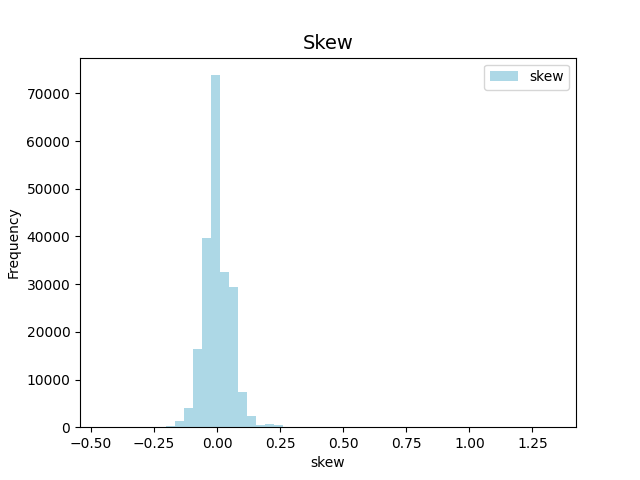

In [23]:
skewdf2=skewdf.toPandas()
fig2 = skewdf2[['skew']].plot(kind='hist', bins=50,facecolor='lightblue')
fig2.set_xlabel("skew",size=10)
fig2.set_title("Skew",size=14)
%matplot plt

Based on above graph, we can conclude that Yelp reviews is not skewed. The distribution of data is close to a normal distribution with a mean close to zero. Therefore, reviewers who left written response are as satisfied as reviewers who did not leave written response.

# Analyzing user data and review data

### Load User Data


In [24]:
#Load user dataset
userdf=spark.read.json('s3://yelpdata.1/yelp_academic_dataset_user.json')
userdf.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

## Do useful users find other reviews more useful?

### Avergae useful vote user received
Useful in review dataset means number of useful vote received for a review written by a user. We can sum all useful votes received by a user for all reviews the user worte and take average. The average can be treated as an index of how useful a user's review is, in other words, how trustworthy the user is.

In [36]:
from pyspark.sql import functions as F
redf=spark.sql("SELECT user_id,useful FROM review")
#sumdf=redf.groupBy('user_id').sum("useful")
avgrdf=redf.groupBy('user_id').avg("useful")
#avgsumdf=redf.groupBy('user_id').agg(sum('useful'),count('useful'))
#sumdf.show(5)
avgrdf.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|             user_id|       avg(useful)|
+--------------------+------------------+
|GPVzsa4VF4qb5JnaT...|               0.0|
|5tm4CI-ags6mdXip-...|0.6666666666666666|
|9QpuHleuFAVlNo4lr...|1.3934426229508197|
|k0EDZJPQv8UY4ZD3n...|               1.0|
|cUMZ1qOVH5aKRerSc...|               0.0|
+--------------------+------------------+
only showing top 5 rows

### Join average useful votes user received (Review) and useful votes sent out by user(User)
Useful means number of useful vote sent by the user in review dataset.

In [37]:
userdf.createOrReplaceTempView('user')
usefuldf=spark.sql("SELECT user_id,useful FROM user")
udf=avgrdf.join(usefuldf,"user_id").drop("user_id")
udf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|avg(useful)|useful|
+-----------+------+
|        0.0|    98|
|        1.0|     7|
|        1.0|   141|
|        1.4|     8|
|        0.0|     2|
+-----------+------+
only showing top 5 rows

## Correlation between average usefulness of user's review and useful votes sent out by the same user

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

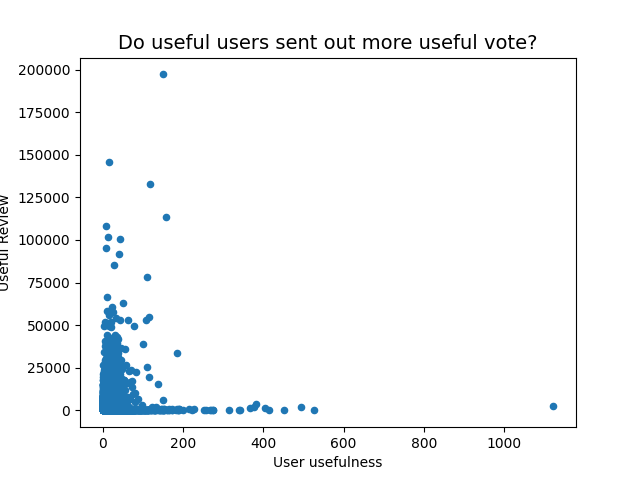

In [62]:
udf2=udf.toPandas()
fig3 = udf2.plot(kind='scatter', x='avg(useful)', y='useful',facecolor='blue')
fig3.set_xlabel("User usefulness",size=10)
fig3.set_ylabel("Useful Review",size=10)
fig3.set_title("Do useful users sent out more useful vote?",size=14)
%matplot plt

As data points all flock together, a graph in logarithmic scale may be better.

In [60]:
from pyspark.sql.functions import log
logavgdf=udf.withColumn("logavg(useful)", log(udf['avg(useful)']))
logdf=logavgdf.withColumn("log(useful)", log(logavgdf['useful']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

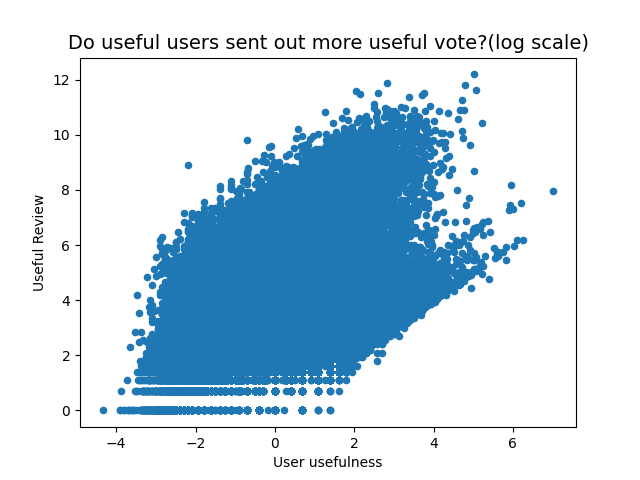

In [61]:
logdf2=logdf.toPandas()
fig4 = logdf2.plot(kind='scatter', x='logavg(useful)', y='log(useful)',facecolor='blue')
fig4.set_xlabel("User usefulness",size=10)
fig4.set_ylabel("Useful Review",size=10)
fig4.set_title("Do useful users sent out more useful vote?(log scale)",size=14)
%matplot plt

Althugh the graph is a bit messy, it does show that users, whoes reviews were thought to be more useful, tend to send out more useful votes to other reivews.

## Do useful users give out more stars?

### Join average useful votes user received (Review) and average stars user give (User)

In [54]:
userstardf=spark.sql("SELECT user_id, average_stars FROM user")
usdf=avgrdf.join(userstardf,"user_id").drop("user_id")
usdf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------+
|avg(useful)|average_stars|
+-----------+-------------+
|        0.0|         3.12|
|        1.0|         1.25|
|        1.0|          4.0|
|        1.4|         3.29|
|        0.0|          4.0|
+-----------+-------------+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

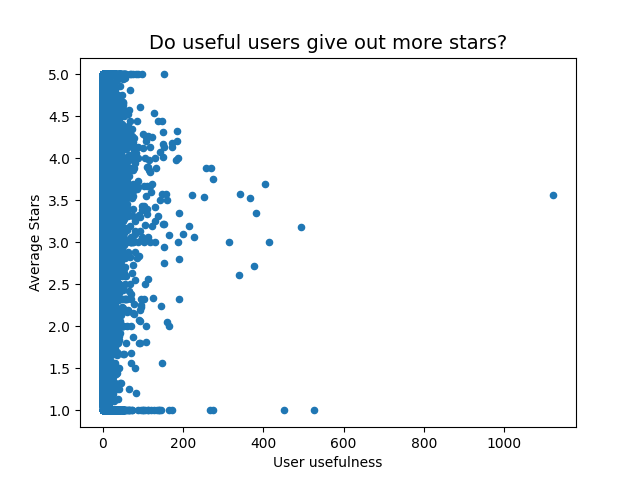

In [63]:
usdf2=usdf.toPandas()
fig5 = usdf2.plot(kind='scatter', x='avg(useful)', y='average_stars',facecolor='blue')
fig5.set_xlabel("User usefulness",size=10)
fig5.set_ylabel("Average Stars", size=10)
fig5.set_title("Do useful users give out more stars?",size=14)
%matplot plt

The above graph shows no correlation between user usefulness and average star given out by the user. But as majority data points locate on the left of the graph, using logarithmic scale on user usefulness axis may show a better result.

In [57]:
from pyspark.sql.functions import log
logusdf=usdf.withColumn("logavg(useful)", log(usdf['avg(useful)']))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

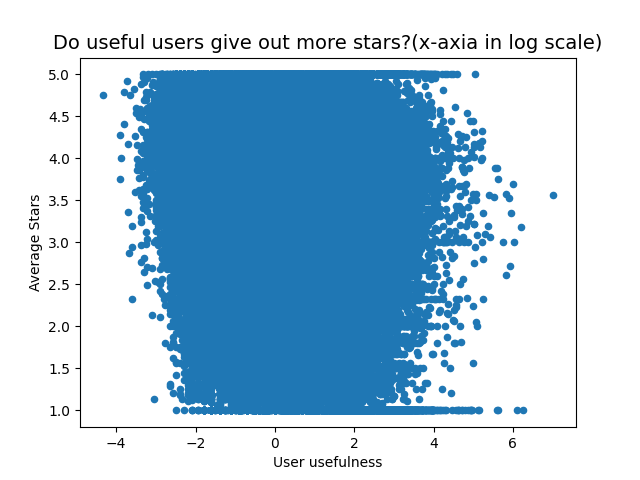

In [64]:
logusdf2=logusdf.toPandas()
fig5 = logusdf2.plot(kind='scatter', x='logavg(useful)', y='average_stars',facecolor='blue')
fig5.set_xlabel("User usefulness",size=10)
fig5.set_ylabel("Average Stars",size=10)
fig5.set_title("Do useful users give out more stars?(x-axia in log scale)",size=14)
%matplot plt

As it is shown on the graph, there is no correlation between user usefulness and average star. Therefore, a user whoe wrote more useful reviews is not considered to give out higher star rating. 